In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import seaborn as sns 

In [2]:
mydata = pd.read_csv('vgsales.csv')

In [3]:
mydata.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
mydata = pd.read_csv('vgsales.csv')

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
mydata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


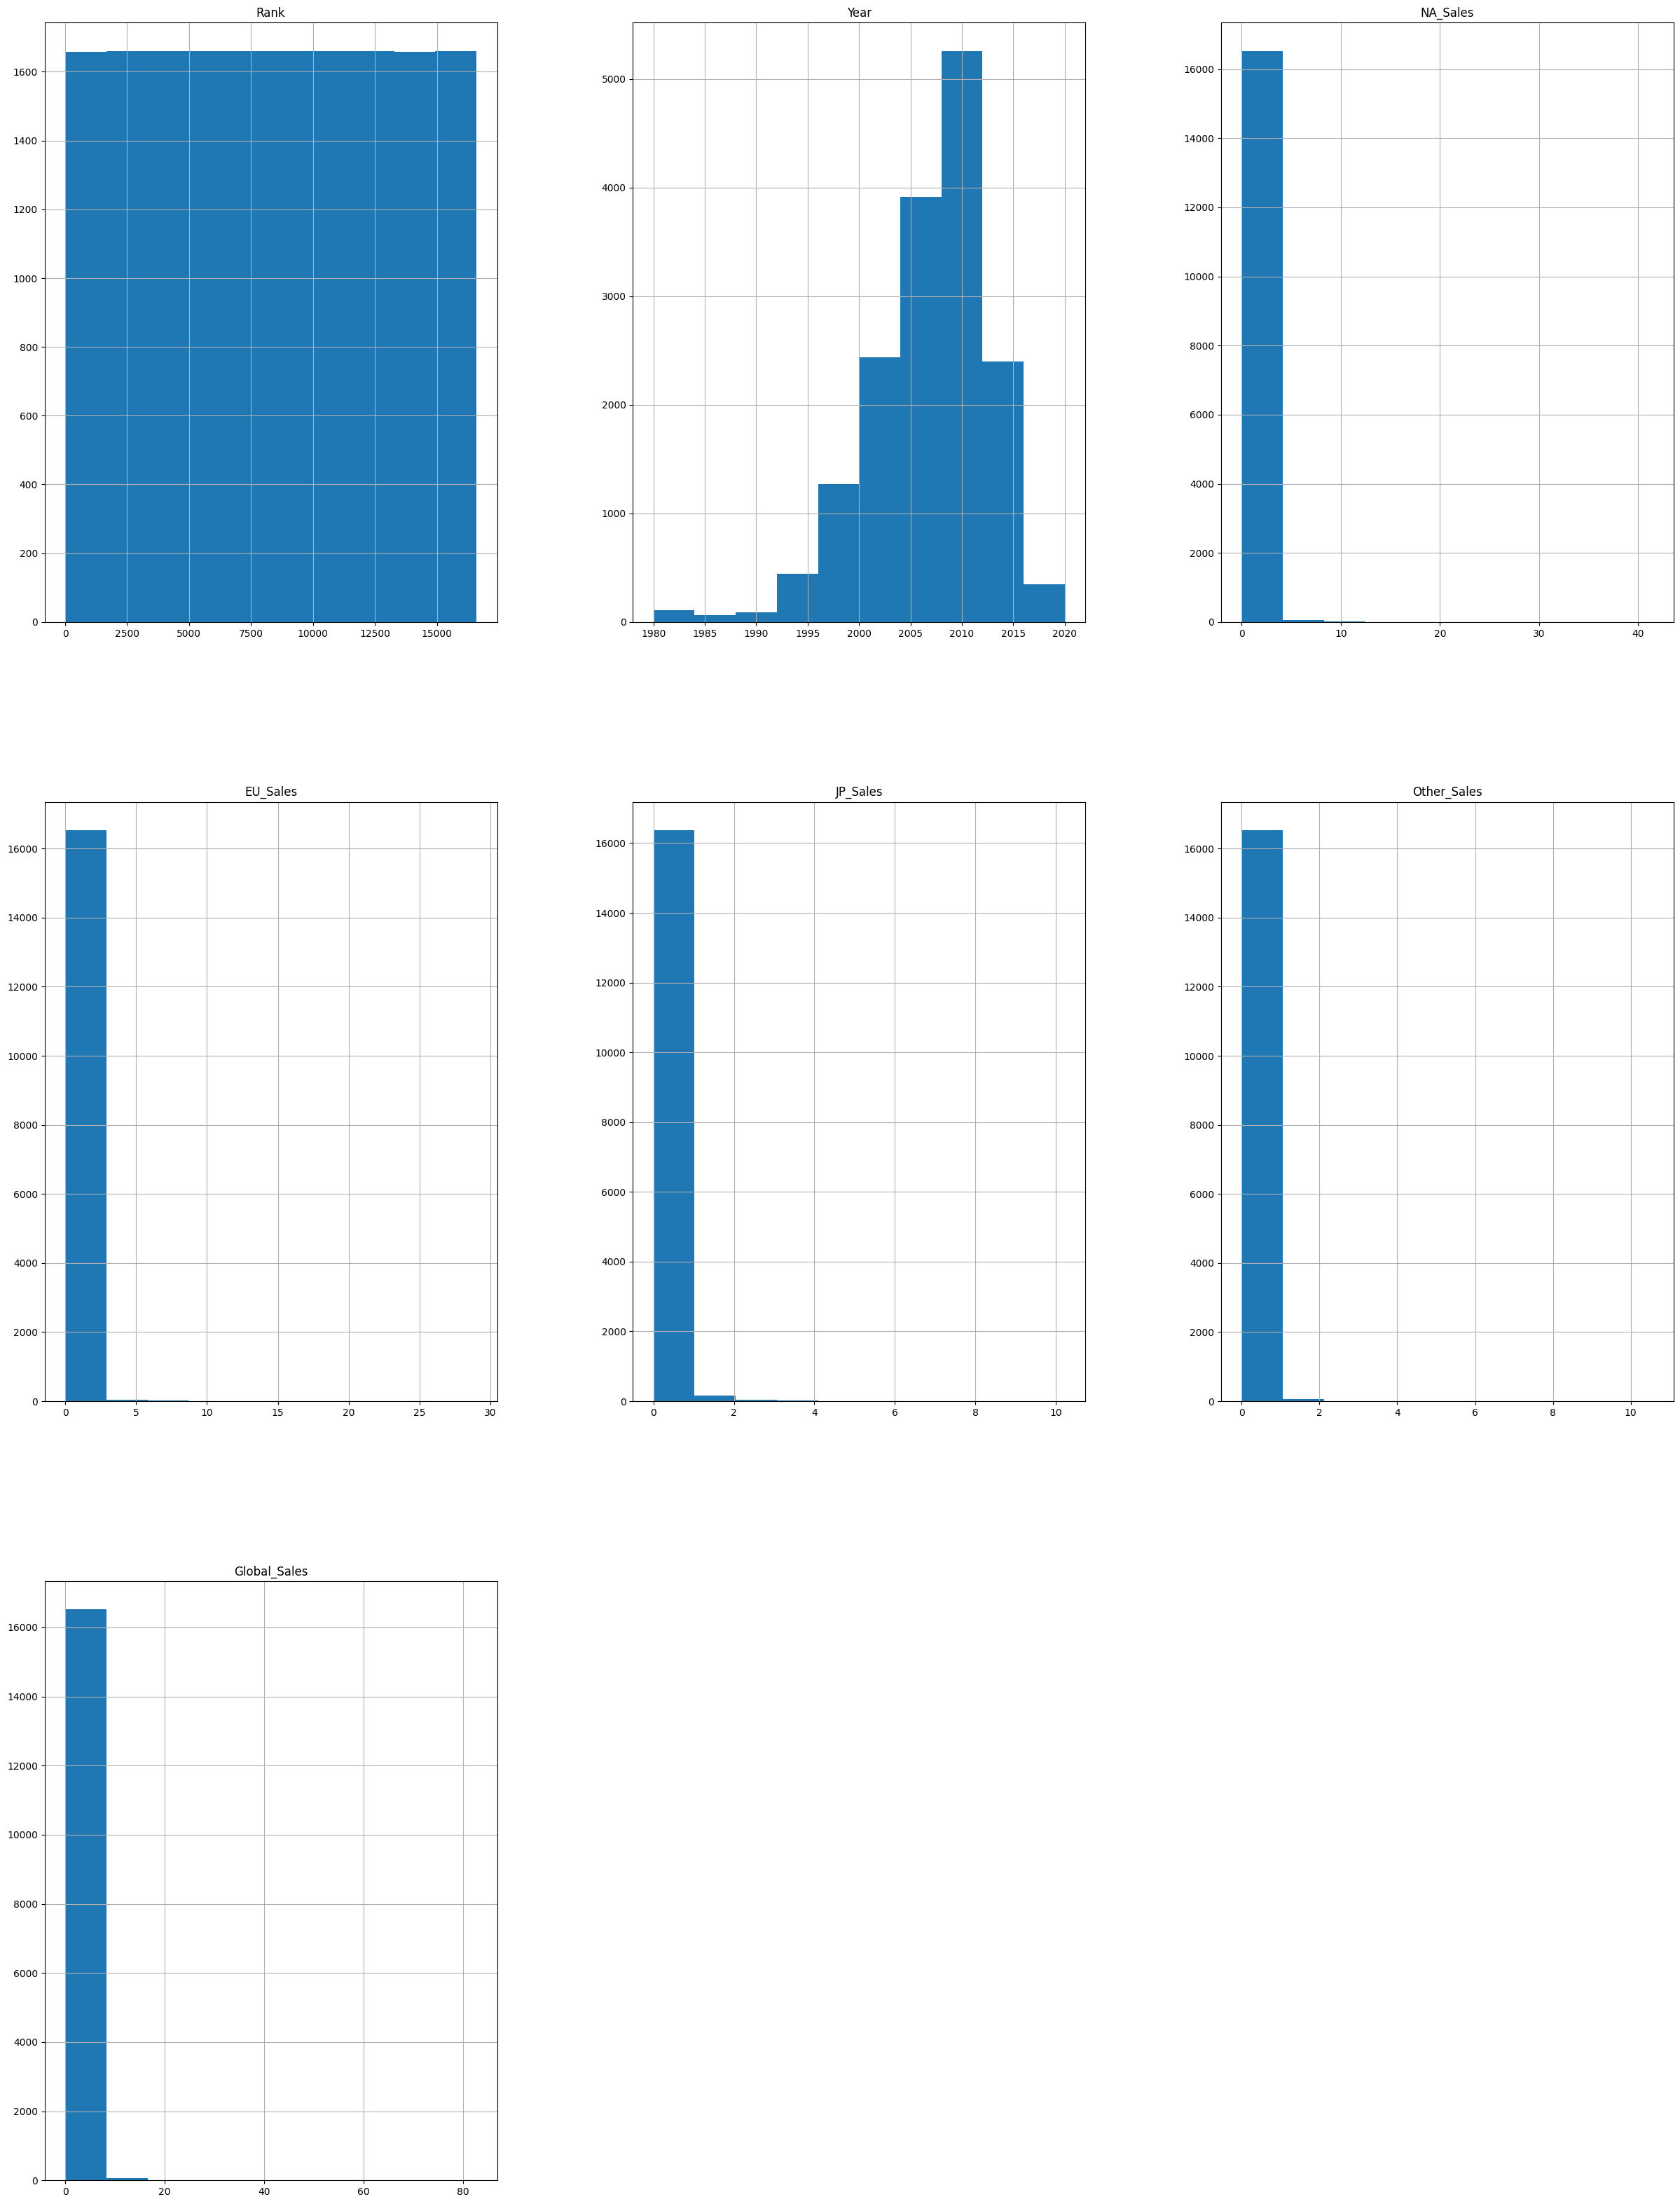

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(30,40))
plt.show()

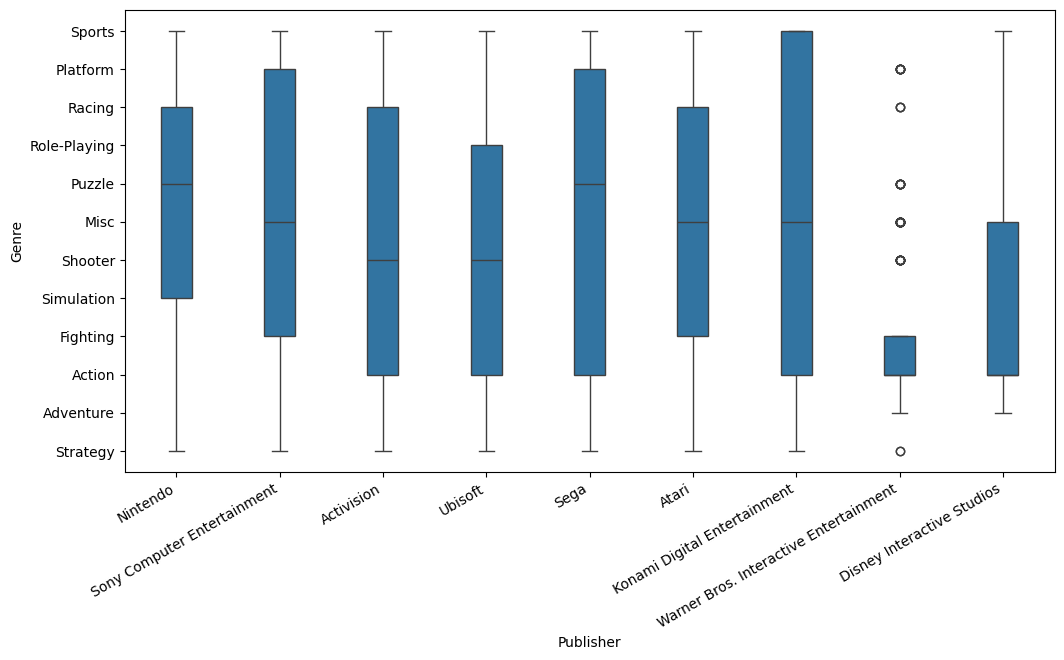

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define selected publishers
selected_publishers = [
    "Sony Computer Entertainment", "Nintendo", "Activision", "Ubisoft", 
    "Sega", "Warner Bros. Interactive Entertainment", "Atari", 
    "Disney Interactive Studios", "Konami Digital Entertainment"
]

# Filter dataset
filtered_data = mydata[mydata["Publisher"].isin(selected_publishers)]

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot with spacing adjustments
sns.boxplot(x="Publisher", y="Genre", data=filtered_data, width=0.3
            
)  # Adjust width to prevent overlap
plt.xticks(rotation=30, ha="right")  # Rotate labels and align them for better readability

# Show plot
plt.show()


In [9]:
# Filter dataset for selected publishers
selected_publishers = [
    "Sony Computer Entertainment", "Activision", "Ubisoft"
   
]


filtered_data = mydata[mydata["Publisher"].isin(selected_publishers)]

# Group by Publisher and Genre, then find year range
year_range = filtered_data.groupby(["Publisher", "Genre"])["Year"].agg(["min", "max"]).reset_index()

# Display results
print(year_range)

                      Publisher         Genre     min     max
0                    Activision        Action  1980.0  2016.0
1                    Activision     Adventure  1999.0  2014.0
2                    Activision      Fighting  1980.0  2002.0
3                    Activision          Misc  1980.0  2015.0
4                    Activision      Platform  1981.0  2015.0
5                    Activision        Puzzle  1985.0  2014.0
6                    Activision        Racing  1981.0  2012.0
7                    Activision  Role-Playing  1996.0  2016.0
8                    Activision       Shooter  1981.0  2016.0
9                    Activision    Simulation  1985.0  2011.0
10                   Activision        Sports  1980.0  2015.0
11                   Activision      Strategy  1994.0  2015.0
12  Sony Computer Entertainment        Action  1995.0  2016.0
13  Sony Computer Entertainment     Adventure  1995.0  2013.0
14  Sony Computer Entertainment      Fighting  1994.0  2012.0
15  Sony

In [10]:
import pandas as pd

# Create crosstab
genre_sales = pd.crosstab(mydata["Genre"], mydata["Global_Sales"], values=mydata["Global_Sales"], aggfunc="sum")

# Summarize total sales per genre
genre_sales["Total Sales"] = genre_sales.sum(axis=1)

# Sort by most sold genre
genre_sales = genre_sales.sort_values(by="Total Sales", ascending=False)

# Show top results
print(genre_sales[["Total Sales"]])

Global_Sales  Total Sales
Genre                    
Action            1751.18
Sports            1330.93
Shooter           1037.37
Role-Playing       927.37
Platform           831.37
Misc               809.96
Racing             732.04
Fighting           448.91
Simulation         392.20
Puzzle             244.95
Adventure          239.04
Strategy           175.12


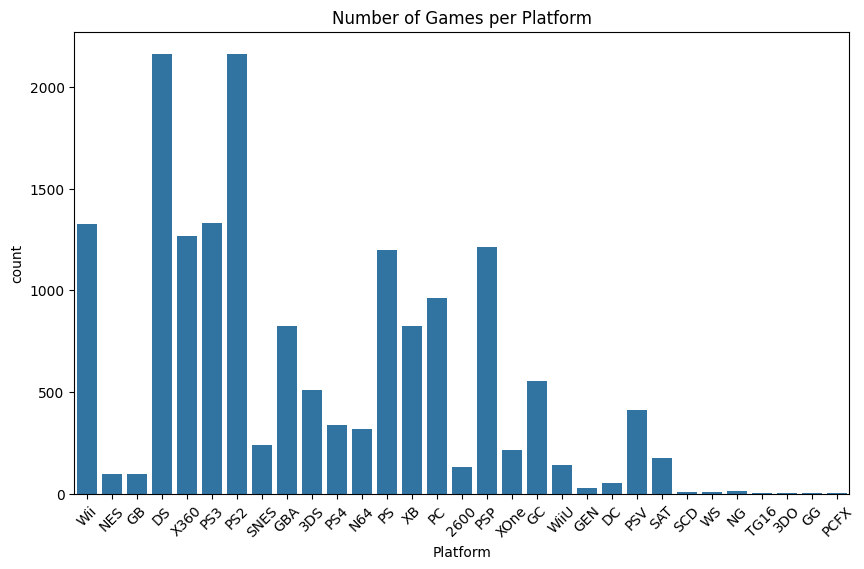

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(x="Platform", data=mydata)
plt.title("Number of Games per Platform")
plt.xticks(rotation=45)
plt.show()

In [12]:

# Create pivot table to sum Global Sales per Genre and Publisher
pivot_publishers = pd.pivot_table(mydata, index="Genre", columns="Publisher", values="Global_Sales", aggfunc="sum", fill_value=0)

# Find the top-selling publisher for each genre by sorting columns within each row
top_publishers = pivot_publishers.apply(lambda x: x.idxmax(), axis=1)

# Display the results
print(top_publishers)

Genre
Action          Take-Two Interactive
Adventure                   Nintendo
Fighting                         THQ
Misc                        Nintendo
Platform                    Nintendo
Puzzle                      Nintendo
Racing                      Nintendo
Role-Playing                Nintendo
Shooter                   Activision
Simulation           Electronic Arts
Sports               Electronic Arts
Strategy                    Nintendo
dtype: object


In [13]:
mydata['Rank'].std()

np.float64(4791.853932896403)

In [14]:
mydata['Global_Sales'].mean()

np.float64(0.5374406555006628)

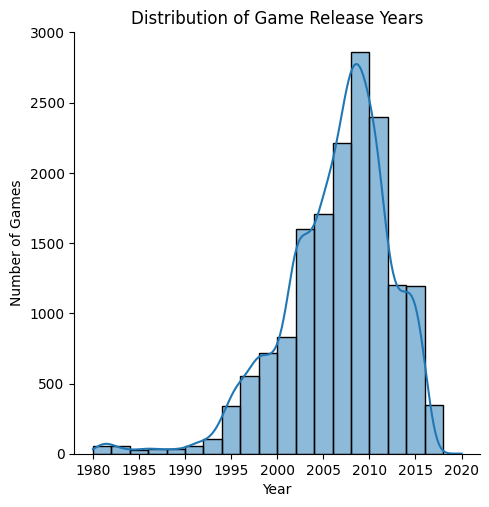

In [15]:


sns.displot(mydata["Year"],kde=True,  bins=20)
plt.title("Distribution of Game Release Years")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

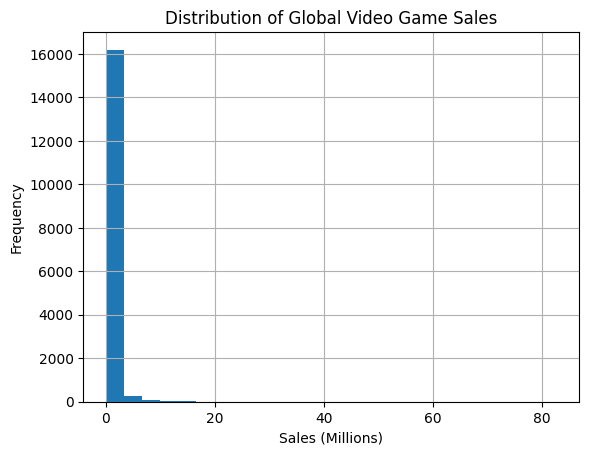

In [16]:


mydata["Global_Sales"].hist(bins=25)
plt.title("Distribution of Global Video Game Sales")
plt.xlabel("Sales (Millions)")
plt.ylabel("Frequency")
plt.show()

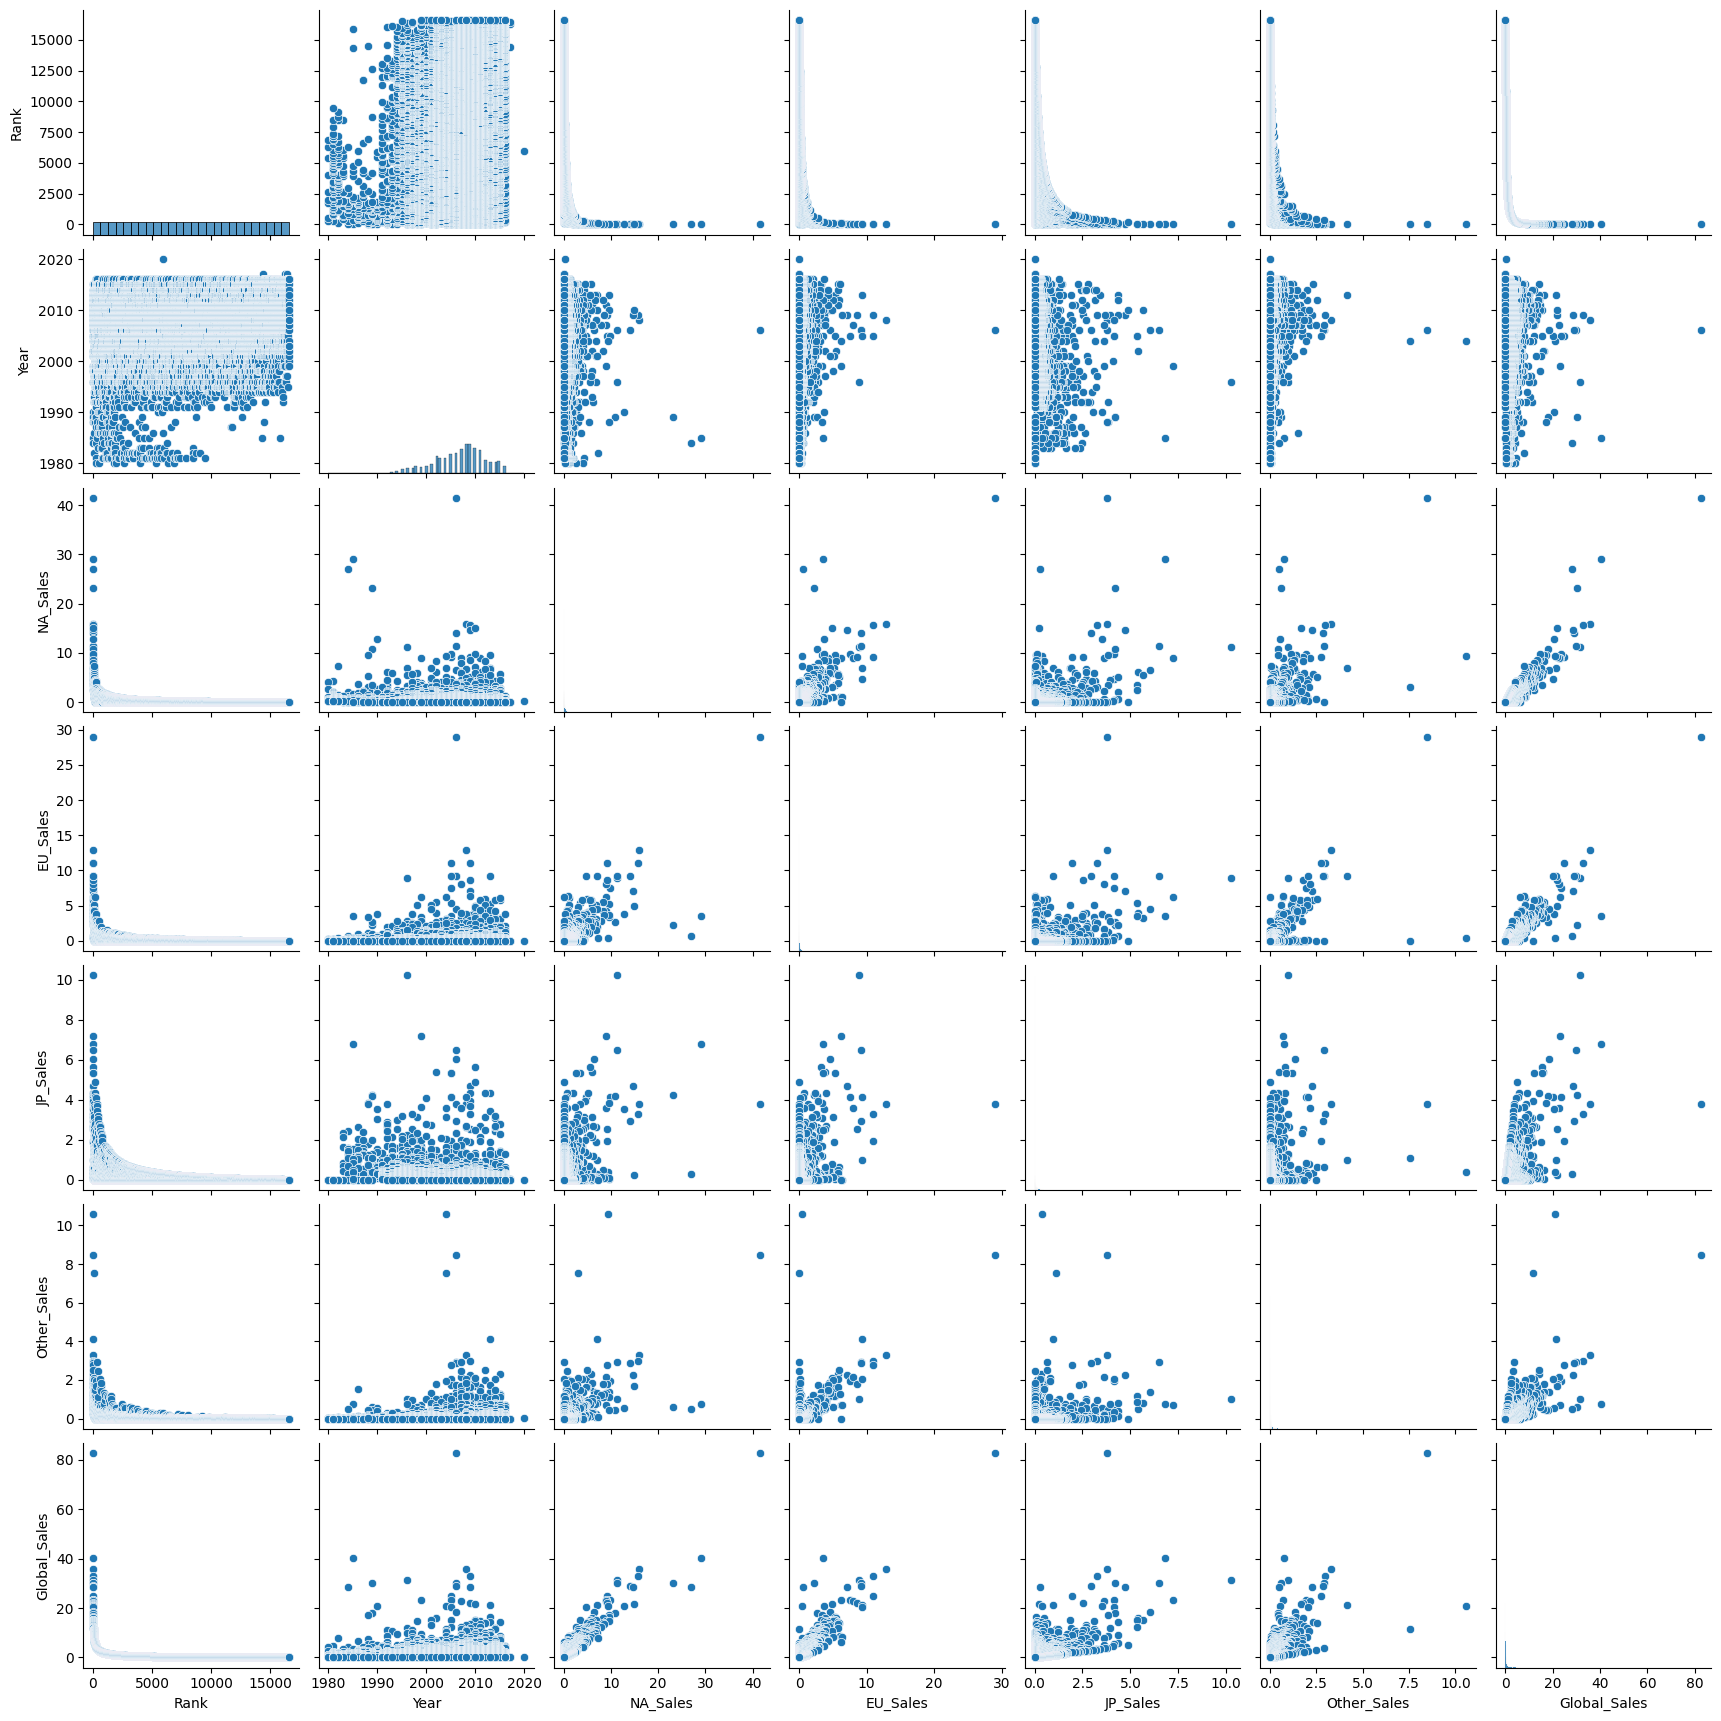

In [17]:
sns.pairplot(mydata)

In [18]:
np.random.seed(42)



In [19]:

x = mydata["Global_Sales"].dropna()



In [20]:


x = st.skewnorm.rvs(10, size=1000)
 


In [21]:

x[0:20]



array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

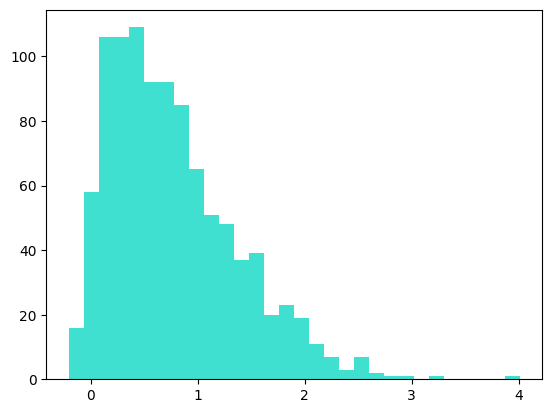

In [22]:

fig, ax = plt.subplots()
_ = plt.hist(x, color="turquoise", bins=30)



In [23]:

xbar = x.mean()
xbar


np.float64(0.7719211854654121)

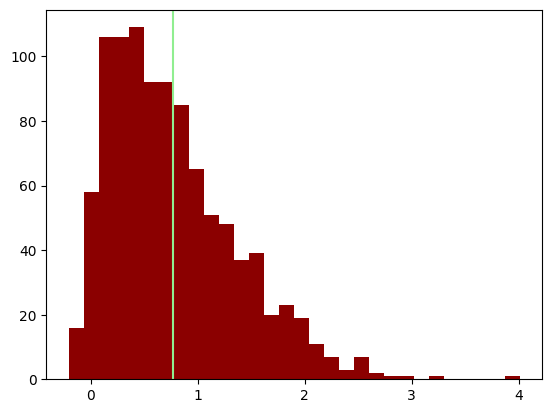

In [24]:


fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='lightgreen')
_ = plt.hist(x, color = 'darkred', bins=30)



In [25]:

np.median(x) 



np.float64(0.651420257427958)

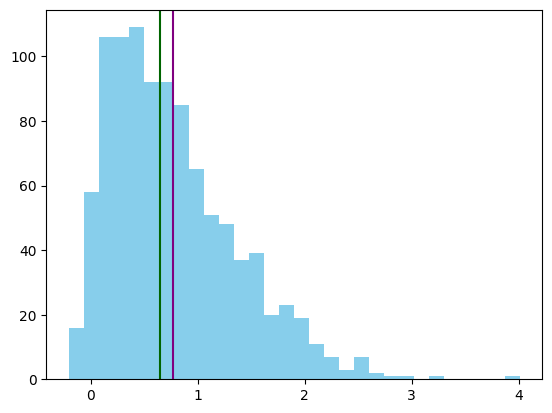

In [26]:

fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='purple')
plt.axvline(x = np.median(x), color='darkgreen')
_ = plt.hist(x, color = 'skyblue',bins=30)



In [27]:

x.var()


np.float64(0.35528419278021617)

In [28]:


x.var()**(1/2)


np.float64(0.5960572059628305)

In [29]:


sigma = x.std()
sigma


np.float64(0.5960572059628305)

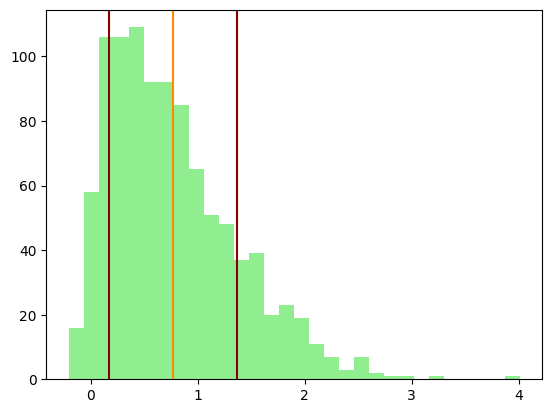

In [30]:


fig, ax = plt.subplots()
plt.axvline(x = xbar, color='darkorange')
plt.axvline(x = xbar+sigma, color='darkred')
plt.axvline(x = xbar-sigma, color='darkred')
_ = plt.hist(x, color = 'lightgreen',bins=30)



In [31]:

sigma/(x.size)**(1/2)



np.float64(0.018848983865986414)

In [32]:

st.sem(x) 


np.float64(0.018858415432183823)

In [33]:


st.sem(x, ddof=0)



np.float64(0.018848983865986414)

In [34]:

x = np.random.normal(size=10000)


In [35]:


sns.set_style('ticks')


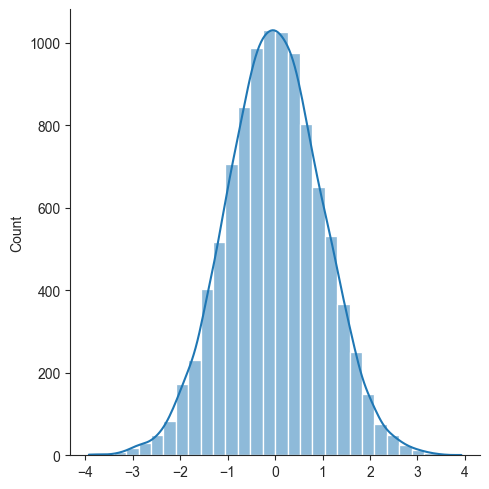

In [36]:


_ = sns.displot(x, kde=True,bins=30)


In [37]:


x.mean()


np.float64(-0.01626305454909193)

In [38]:


x.std()


np.float64(1.0039756140435032)

In [39]:


x_sample = np.random.choice(x, size=10, replace=False)
x_sample


array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

In [40]:


x_sample.mean()


np.float64(-0.35958129882198664)

In [41]:


def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means


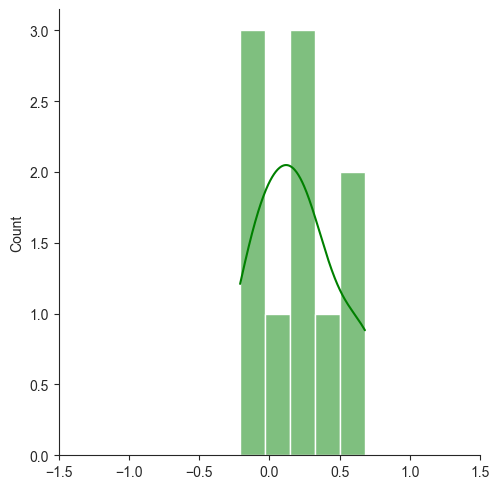

In [42]:


sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)



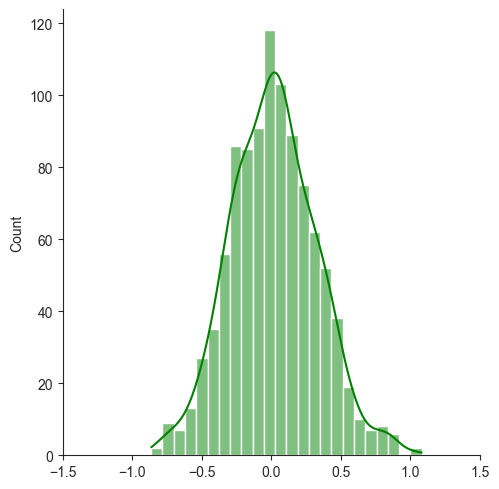

In [43]:

sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)


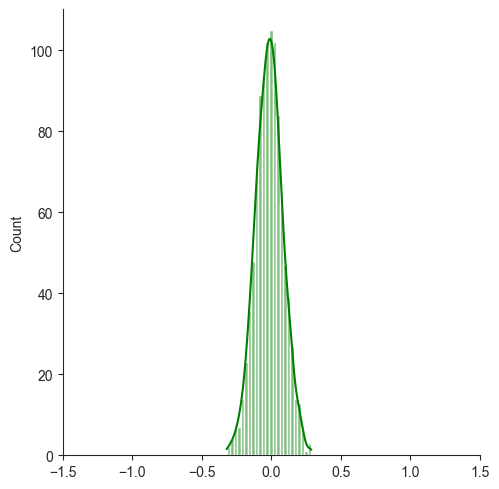

In [44]:


sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)


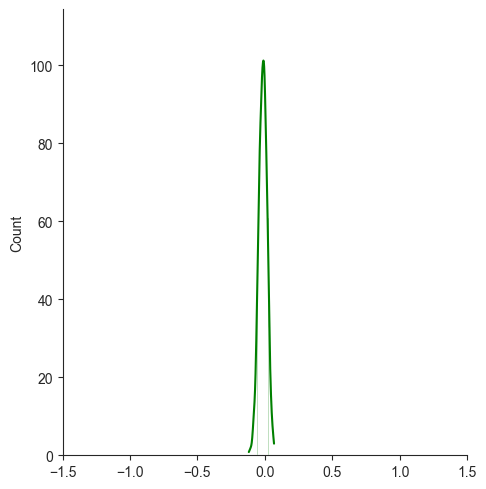

In [45]:


sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)



In [46]:

s = st.skewnorm.rvs(10, size=10000)



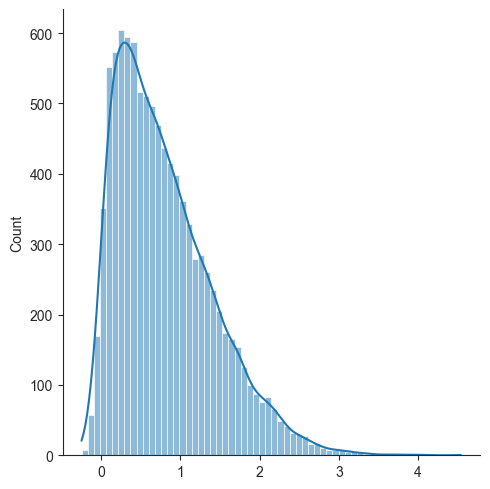

In [47]:

_ = sns.displot(s, kde=True)



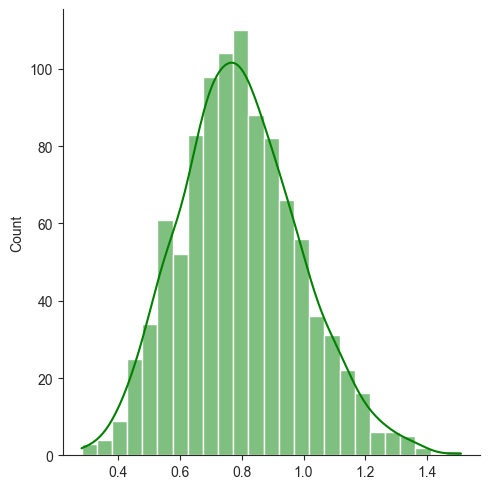

In [48]:

_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)


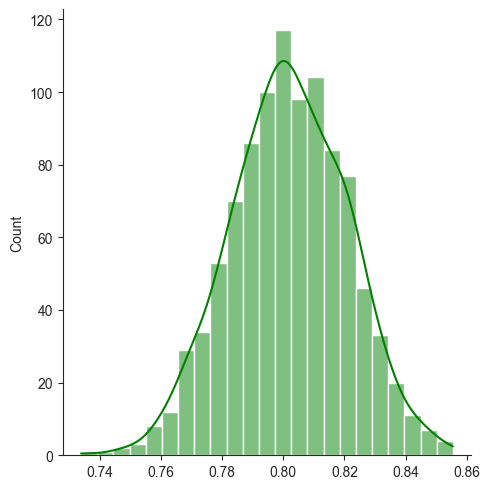

In [49]:


_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)


In [50]:


m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))



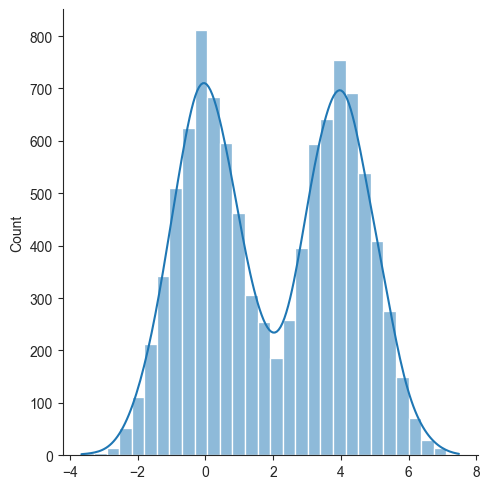

In [51]:

_ = sns.displot(m, kde=True)


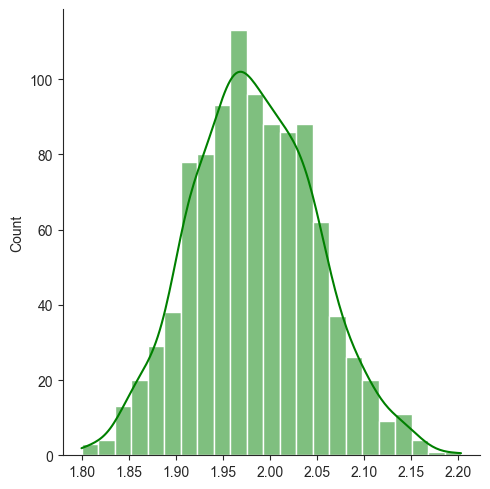

In [52]:


_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)


In [53]:


u = np.random.uniform(size=10000)


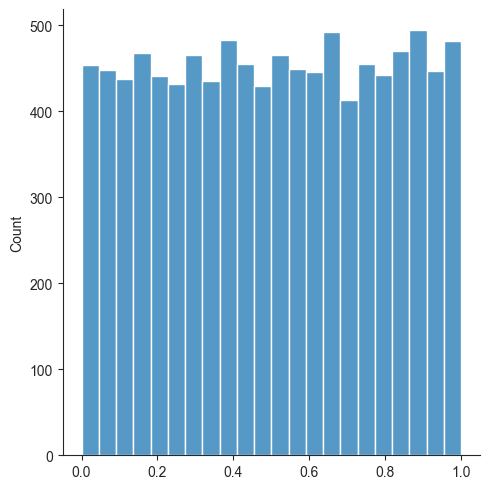

In [54]:


_ = sns.displot(u)



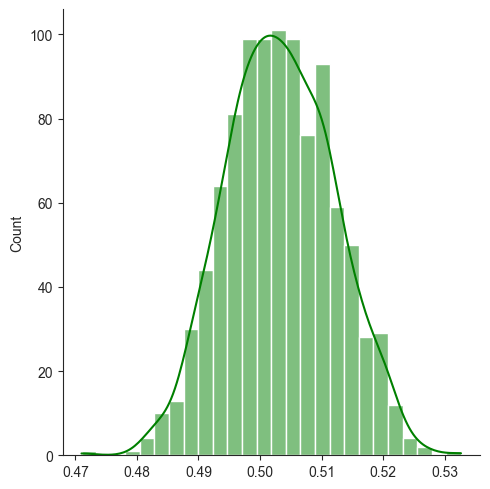

In [55]:

_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)


In [56]:


x_i = 85
mu = 60
sigma = 10


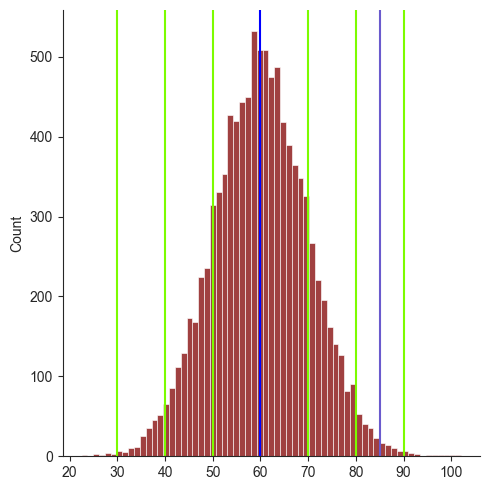

In [57]:


x = np.random.normal(mu, sigma, 10000)
sns.displot(x, color='maroon')
ax.set_xlim(0, 100)
plt.axvline(mu, color='blue')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='lawngreen')
_ = plt.axvline(x_i, color='slateblue')



In [58]:

z = (x_i - mu)/sigma
z



2.5

In [59]:

z = (x_i - np.mean(x))/np.std(x)
z


np.float64(2.5063103401632336)

In [60]:


len(np.where(x > 85)[0])


69

In [61]:


100*69/10000



0.69

In [62]:

np.percentile(x, 99)


np.float64(83.35787058294662)

In [63]:


mu = 90
sigma = 2



In [64]:

y = np.random.normal(mu, sigma, 10000)



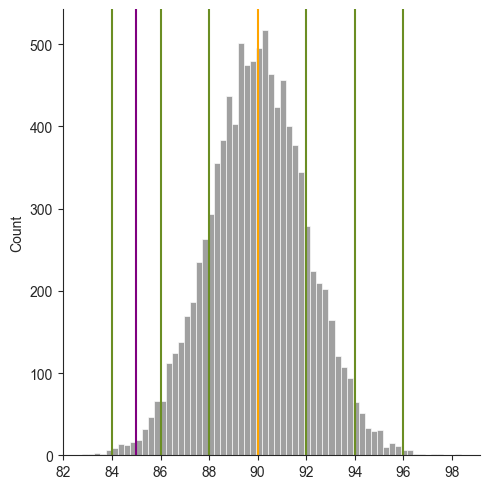

In [65]:

sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')


In [66]:


z = (x_i - mu)/sigma
z


-2.5

In [67]:


z = (x_i - np.mean(y))/np.std(y)
z



np.float64(-2.479852596293303)

In [68]:

len(np.where(y > 85)[0])



9933

In [69]:

100*9933/10000


99.33

In [70]:


10000-9933


67

In [71]:


np.percentile(y, 1)


np.float64(85.3781445632019)

In [72]:


p_below = st.norm.cdf(-2.5)
p_below


np.float64(0.006209665325776132)

In [73]:


p_below*10000


np.float64(62.096653257761325)

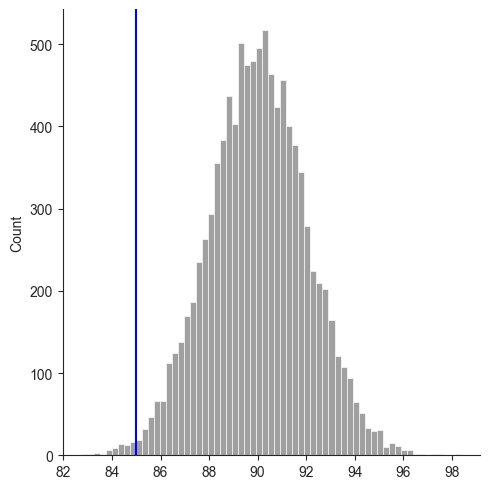

In [74]:


sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')


In [75]:


st.norm.cdf(2.5)


np.float64(0.9937903346742238)

In [76]:


p_above = 1-st.norm.cdf(2.5)
p_above


np.float64(0.006209665325776159)

In [77]:


p_above*10000


np.float64(62.09665325776159)

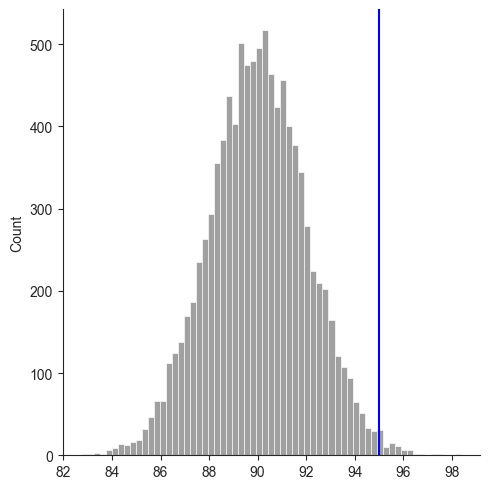

In [78]:


sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')


In [79]:


p_outside = p_below + p_above
p_outside



np.float64(0.01241933065155229)

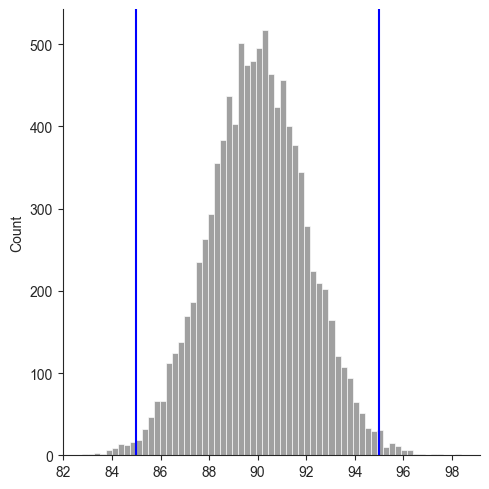

In [80]:

p_outside*10000
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')


In [81]:


st.norm.ppf(.025)


np.float64(-1.9599639845400545)

In [82]:


st.norm.ppf(.975)


np.float64(1.959963984540054)

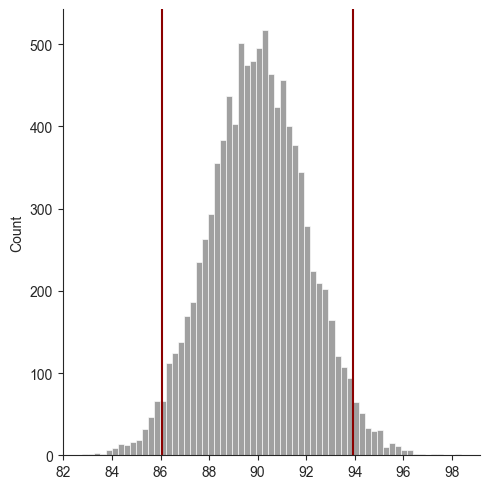

In [83]:


sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')



In [84]:

st.norm.ppf(.005)


np.float64(-2.575829303548901)

In [85]:


st.norm.ppf(.995)


np.float64(2.5758293035489004)

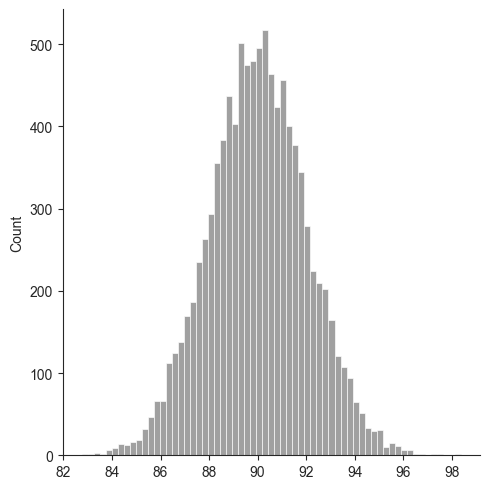

In [86]:


sns.displot(y, color='gray')


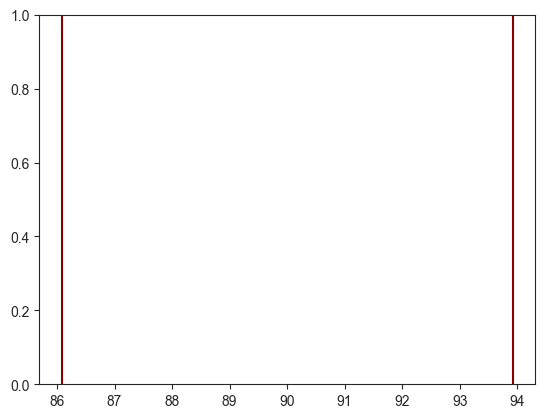

In [87]:


plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')


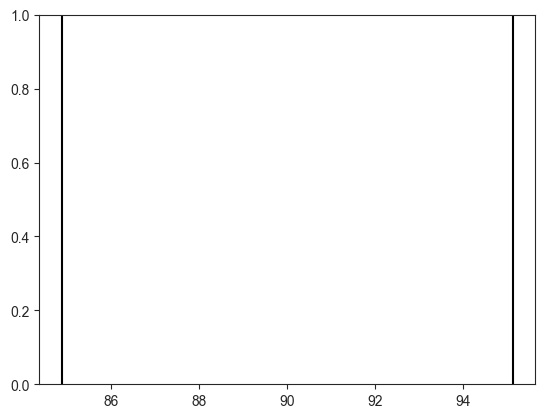

In [88]:


plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')


In [89]:



p_below = st.norm.cdf(0)
p_below


np.float64(0.5)

In [90]:


p_above = 1-st.norm.cdf(0)
p_above


np.float64(0.5)

In [91]:


p_below + p_above


np.float64(1.0)

In [92]:


def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))



In [93]:

p_from_z(0)


np.float64(1.0)

In [94]:


p_below = st.norm.cdf(-2)
p_below



np.float64(0.0227501319481792)

In [95]:

p_above = 1-st.norm.cdf(2)
p_above


np.float64(0.02275013194817921)

In [96]:


p_below + p_above


np.float64(0.04550026389635841)

In [97]:


p_from_z(2)



np.float64(0.0455002638963584)

In [98]:

p_from_z(4)



np.float64(6.334248366623973e-05)

In [99]:

0.0000633



6.33e-05

In [100]:

-np.log10(6.33e-05)



np.float64(4.198596289982645)

In [101]:

x = [48, 50, 54, 60]



In [102]:

xbar = np.mean(x)
xbar


np.float64(53.0)

In [103]:


sx = st.sem(x)
sx


np.float64(2.6457513110645907)

In [104]:


t = (xbar-50)/sx
t



np.float64(1.1338934190276817)

In [105]:

# my_n is number of observation that you wnat to compare it to the mean

def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"


In [106]:


# when p_value is <0.5 mean the provided observation
# is not significantly differ from the provided mean
p_from_t(t, len(x))


np.float64(0.3392540508564543)

In [107]:


st.ttest_1samp(x, 50)



TtestResult(statistic=np.float64(1.1338934190276817), pvalue=np.float64(0.3392540508564543), df=np.int64(3))

In [108]:

penguins = sns.load_dataset('penguins').dropna() # some rows are missing data


In [109]:


penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [110]:


np.unique(penguins.species, return_counts=True)


(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [111]:


adelie = penguins[penguins.species == 'Adelie']



In [112]:

adelie


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [113]:


np.unique(adelie.island, return_counts=True)


(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [114]:


np.unique(adelie.sex, return_counts=True)



(array(['Female', 'Male'], dtype=object), array([73, 73]))

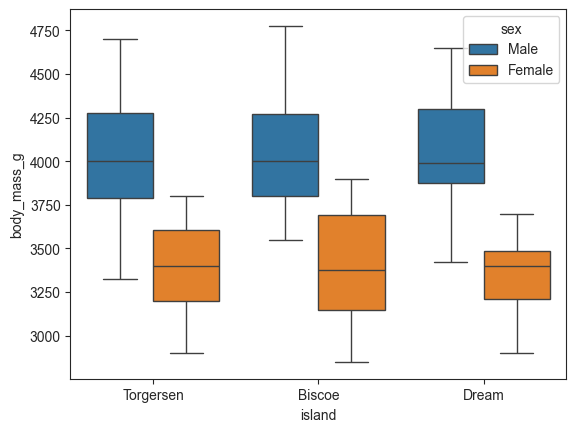

In [115]:

_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)



In [116]:

f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f


array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [117]:


m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m


array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [118]:


fbar = f.mean()
fbar


np.float64(3.368835616438356)

In [119]:


mbar = m.mean()
mbar


np.float64(4.043493150684932)

In [120]:


mbar = m.mean()
mbar


np.float64(4.043493150684932)

In [121]:


nf = f.size
nm = m.size